# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sinasc = pd.read_csv('./data/sinasc_RO_2019.csv')

In [3]:
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
sinasc['APGAR5_DESC'] = None
sinasc.loc[sinasc['APGAR5']<=3,'APGAR5_DESC'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5']>3)&(sinasc['APGAR5']<=5),'APGAR5_DESC'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5']>5)&(sinasc['APGAR5']<=7),'APGAR5_DESC'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5']>7)&(sinasc['APGAR5']<=10),'APGAR5_DESC'] = 'normal'

In [5]:
sinasc['APGAR5_DESC'].unique()

array(['normal', 'asfixia leve', 'asfixia grave', 'asfixia moderada',
       None], dtype=object)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '42 semanas e mais'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '22 a 27 semanas'),
  Text(4, 0, '28 a 31 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

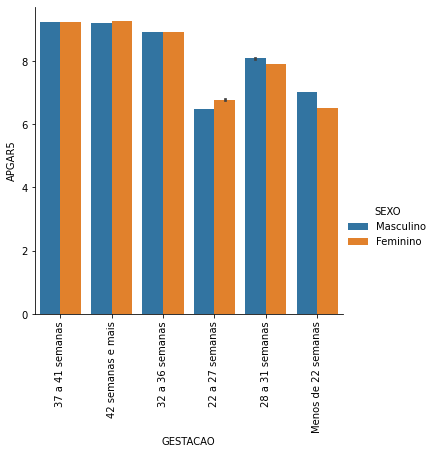

In [20]:
sns.catplot(y='APGAR5',x='GESTACAO',hue='SEXO',kind='bar', data = sinasc,ci=True,dodge=True)
plt.xticks(rotation=90)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
pd.crosstab(sinasc['GESTACAO'],sinasc['APGAR5_DESC'])

APGAR5_DESC,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
apgar_gestacao = pd.crosstab(sinasc['GESTACAO'],sinasc['APGAR5_DESC'])
apgar_gestacao

APGAR5_DESC,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


In [9]:
freq_apgar_gestacao = apgar_gestacao.div(apgar_gestacao.sum(axis=1),axis=0)
freq_apgar_gestacao

APGAR5_DESC,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


In [10]:
pd.crosstab(sinasc['GESTACAO'],sinasc['APGAR5_DESC'],normalize='index')

APGAR5_DESC,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

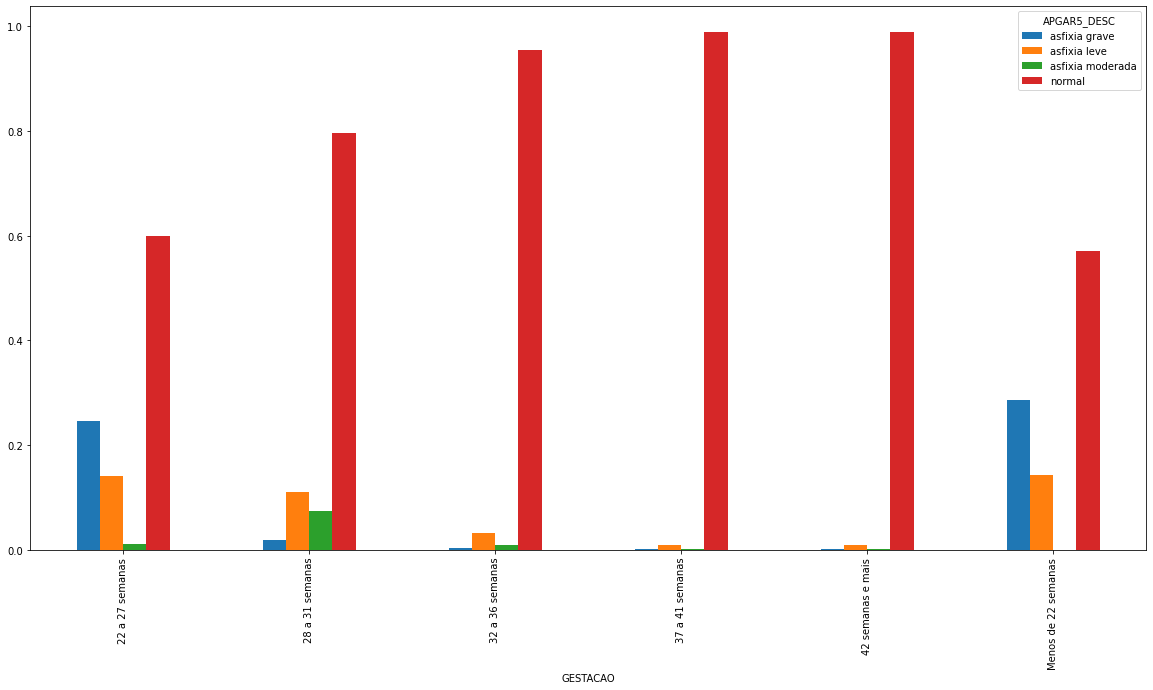

In [18]:
freq_apgar_gestacao.plot.bar()
plt.rc('figure',figsize=(12,10))

In [63]:
freq_apgar_gestacao.reset_index()

APGAR5_DESC,GESTACAO,asfixia grave,asfixia leve,asfixia moderada,normal
0,22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
1,28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
2,32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
3,37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
4,42 semanas e mais,0.001433,0.008596,0.001433,0.988539
5,Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

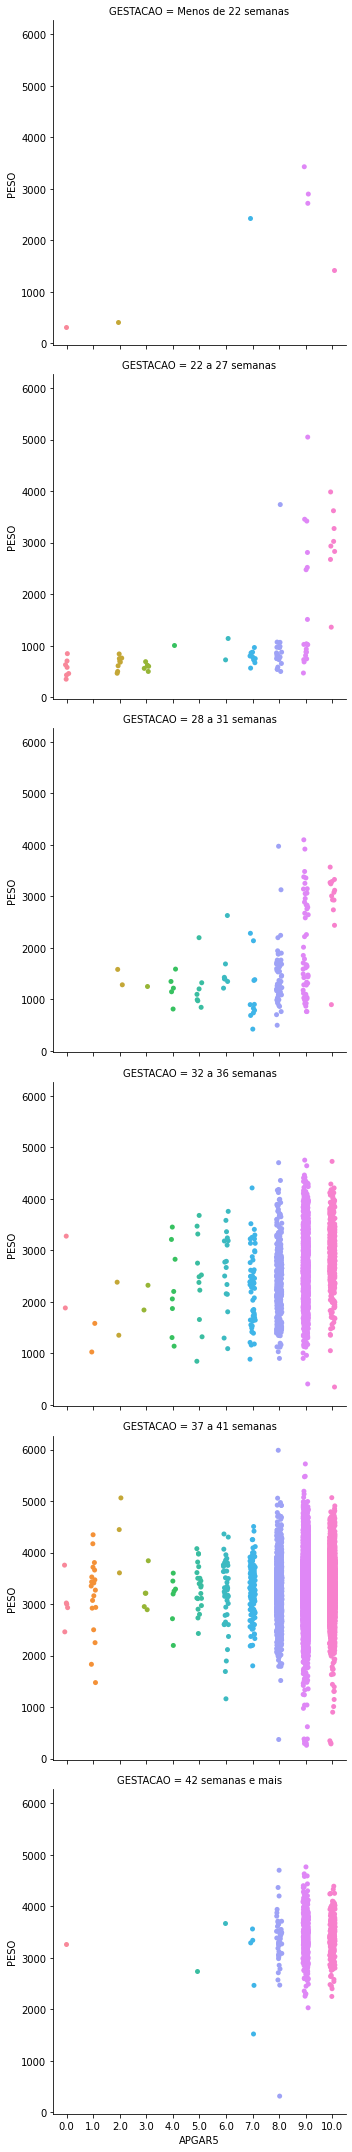

In [13]:
gestacao = ['Menos de 22 semanas', '22 a 27 semanas','28 a 31 semanas'
            , '32 a 36 semanas','37 a 41 semanas','42 semanas e mais']
sns.catplot(x='APGAR5',y='PESO',row='GESTACAO',row_order=gestacao,data=sinasc)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '42 semanas e mais'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '22 a 27 semanas'),
  Text(4, 0, '28 a 31 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

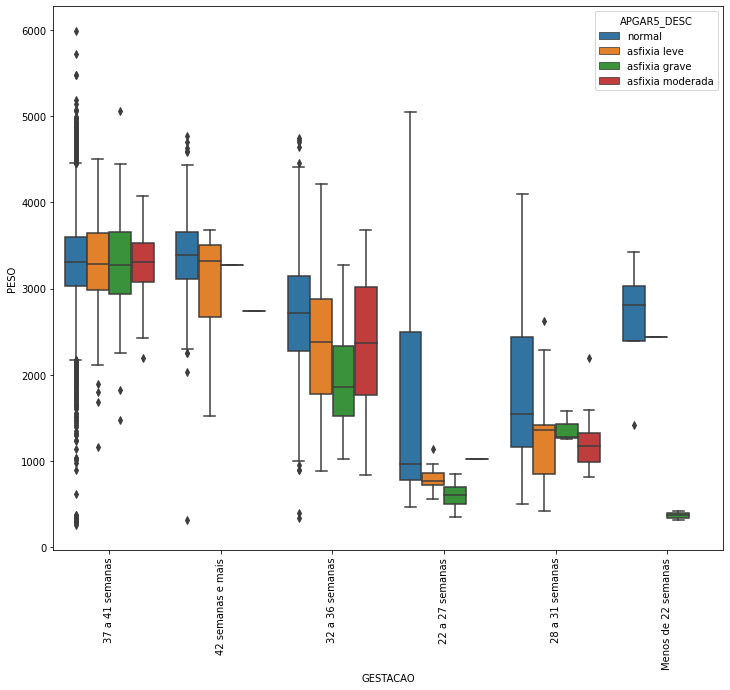

In [19]:
sns.boxplot(y='PESO', x='GESTACAO',hue='APGAR5_DESC',data=sinasc)
plt.xticks(rotation=90)